<div id="capcalera">
<p><a href="https://colab.research.google.com/github/algorismica2019/algorismica2019.github.io/blob/master/problemes/TravelingSalesmanProblem-Original.ipynb"><img style="margin:-10px 10px 20px 0" width="150px" align="right" src="https://raw.githubusercontent.com/algorismica2019/algorismica2019.github.io/master/problemes/assets/colab-badge.png?raw=1" alt="Obrir a Colab" title="Obrir i executar a Google Colaboratory"></a></p>
<p style="clear:both"><img align='left' width="300px" style="padding-right:10px;float=left" src="https://raw.githubusercontent.com/algorismica2019/algorismica2019.github.io/master/problemes/assets/al-khwarizmi.png">Aquest notebook forma part dels continguts teòrics dels problemes de l'assignatura d'<strong>Algorísmica</strong> deL Grau d'Enginyeria Informàtica a la <a href="https://mat.ub.edu">Facultat de Matemàtiques i Informàtica</a> de la <a href="https://www.ub.edu">Universitat de Barcelona</a> impartida per <em>Jordi Vitrià</em> i <em>Mireia Ribera</em></p>

<p>Els problemes s'ofereixen sota llicència <a href="https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode">CC-BY-NC-ND license</a>, i el codi sota <a href="https://opensource.org/licenses/MIT">Llicència MIT</a>.</p>

<p style="clear:both;text-align:center">&lt; <a href="Mastermind.ipynb">Problema anterior</a> | <a href="LListatProblemes.ipynb">LListat de problemes</a> | <a href="Annex.ipynb">Problema següent</a> &gt; </p>

</div>

# <span class="tema">( Python)</span> Traveling Salesman Problem

Source: http://nbviewer.ipython.org/url/norvig.com/ipython/TSPv3.ipynb

# Traveling Salesman Problem: Motivation

http://www.wired.com/business/2013/06/ups-astronomical-math/

> At UPS, the average driver makes about 120 deliveries per day, says Jack Levis, the shipping giant’s director of process management.

> 30 million—**The cost to UPS per year if each driver drives just one more mile each day than necessary**. 

> 15 trillion trillion—The number of possible routes a driver with just 25 packages to deliver can choose from. 

> 55,000—The number of “package cars” (the brown trucks) in UPS’ U.S. fleet. 

> 85 million—**The number of miles Levis says UPS’ analytics tools are saving UPS drivers per year**.

> 16 million—The number of deliveries UPS makes daily.

> 30—**The maximum number of inches UPS specifies a driver should have to move to select the next package. This is accomplished through a meticulous system for loading packages into the truck in the order in which they’ll be delivered**.

> 200 million—The number of addresses mapped by UPS drivers on the ground.

> 74—The number of pages in the manual for UPS drivers detailing the best practices for maximizing delivery efficiency.

> 100 million—The reduction in the number of minutes UPS trucks spend idling thanks in part, the company says, to onboard sensors that helped figure out when in the delivery process to turn the truck on and off.

> 200—The number of data points monitored on each delivery truck to anticipate maintenance issues and determine the most efficient ways to operate the vehicles. 

# The Traveling Salesperson Problem

Let's consider the [*Traveling Salesperson Problem*](http://en.wikipedia.org/wiki/Traveling_salesman_problem): 

> Given a set of cities, and the distances between each pair of cities, find a **tour** of the cities with the minimum total distance.  A **tour** means you start at one city, visit every other city exactly once, and then return to the starting city.

This is a well-known [*intractable*] problem, meaning that there are no efficient solutions that work for a large number of cities.  

But we can create an inefficient algorithm that works fine for a small number of cites.  We can also find a *nearly*-shortest tour over thousands of cities. 

In this exercise we will look at some algorithms for solving the problem.  The most important lesson is how to *think about solving a problem* like this; the details of this particular problem are less important.
                                
### Vocabulary 

Let's think first about the *vocabulary* of this problem: what are the important concepts, and are we sure we understand them well enough to implement the concepts (as data or functions)? 

We will start to consider possible implementations, in the Python programming language, but won't make definitive choices yet:

- **City**: For the purpose of this exercise, a city is "atomic" in the sense that we don't have to know anything about the components or attributes of a city; we don't need to know its name, population, or anything else, except that we do have to know how far it is from other cities.
- **Cities**: We will need to represent a set of cities; **Python's `set` datatype** might be appropriate for that.
- **Distance**: We will need the distance between two cities.  If `A` and `B` are cities, this could be done with a function, `distance(A, B),` or with a dict, `distance[A][B]` , or `distance[A, B]` with an array if `A` and `B` are integer indexes.  The resulting distance will be a real number (which Python calls a `float`).
- **Tour**: A tour is an ordered list of cities; Python's `list` or `tuple` datatypes would work.
- **Total distance**: The total distance for a tour is the sum of the distances of adjacent cities in the tour.  We will probably have a function, `total_distance(tour)`.

## Preliminaries

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

## Algorithm 1: Try All Tours (exact_TSP)

Here is our first algorithm, which finds the tour with shortest total distance with a straightforward approach:

> Generate all the possible tours of the cities, and choose the shortest one (the tour with the minimum total distance).

Here's the design philosophy we will use:

> Write Python code that closely mirrors the English description of the algorithm (naive).

In [3]:
def exact_TSP(cities):
    "Generate all possible tours of the cities and choose the shortest one."
    return shortest(alltours(cities))

def shortest(tours): 
    "Return a tour from a set with the minimum total distance."
    return min(tours, key=total_distance)

<div class = "alert alert-danger" >
Note 1: We have not yet defined the function `total_distance`, nor `alltours`.
</div> 

<div class = "alert alert-danger" >
Note 2: In Python `min(`*collection*`,key=`*function*`)` means to find the element *x* that is a member of *collection* such that *function(x)* is minimized. So `shortest` finds the tour whose `total_distance` in the minimal among the tours. So our Python code implements (and closely mimics) our English description of the algorithm.  Now we need to define what a tour is, and how to measure total distance.</div> 

Representing Tours
------------------

A tour starts in one city, and then visits each of the other cities in order, before finally returning to the start.  

+ A natural representation of the set of available cities is a Python `set`.

+ A natural representation of a tour is a sequence that is a *permutation* of the set. 

Below we list the 6 possible tours/permutations of a set of three cities. The tuple `(1, 2, 3)`, for example, represents a tour that starts in city 1, moves to 2, then 3, and then returns to 1 to finish the tour.
    


In [4]:
alltours = itertools.permutations  # The permutation function is already defined 
                                   # in the itertools module

cities = {1, 2, 3}                 # Set of cities

print(list(alltours(cities)))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]


In [5]:
cities = {1, 2, 3, 4}

print(list(alltours(cities)))

[(1, 2, 3, 4), (1, 2, 4, 3), (1, 3, 2, 4), (1, 3, 4, 2), (1, 4, 2, 3), (1, 4, 3, 2), (2, 1, 3, 4), (2, 1, 4, 3), (2, 3, 1, 4), (2, 3, 4, 1), (2, 4, 1, 3), (2, 4, 3, 1), (3, 1, 2, 4), (3, 1, 4, 2), (3, 2, 1, 4), (3, 2, 4, 1), (3, 4, 1, 2), (3, 4, 2, 1), (4, 1, 2, 3), (4, 1, 3, 2), (4, 2, 1, 3), (4, 2, 3, 1), (4, 3, 1, 2), (4, 3, 2, 1)]


Representing Cities and Distance
--------------------------------

Now for the notion of *distance*.  

We define `total_distance(tour)` as the sum of the distances between consecutive cities in the tour; that part is shown below and is easy (with one Python-specific trick: when `i` is 0, then `distance(tour[0], tour[-1])` gives us the wrap-around distance between the first and last cities, because `tour[-1]` is the last element of `tour`).  

In [6]:
def total_distance(tour):
    "The total distance between each pair of consecutive cities in the tour."
    return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

Before we can define `distance(A, B)`, the distance between two cities, we have to make a choice. In the fully general version of the TSP problem, the distance between two cities could be anything: it could be the amount of time it takes to travel between cities, the number of dollars it costs, or anything else. So the distances could be represented by a matrix `distance[A][B]`, where any entry in the matrix could be any numeric value.
    
But we will make the choice not to allow that full generality, and instead restrict ourselves to [Euclidean distance](http://en.wikipedia.org/wiki/Euclidean_distance), the straight-line distance between points in a two-dimensional plane. So each city will be represented by a two-dimensional point: a pair of *x* and *y* coordinates. 

We will use the constructor function `City`, so that `City(300, 0)` creates a city with x-coordinate of 300 and y coordinate of 0.  Then `distance(A, B)` will be a function that uses the *x* and *y* coordinates to compute the distance between `A` and `B`.
        
How will we represent a two-dimensional point?  Here are some choices, with their pros and cons:

* **Tuple:** A point (or city) is a two-tuple of (*x*, *y*) coordinates, for example, `(300, 0)`.  **Pro:** Very simple, easy to break a point down into components. Reasonably efficient. **Con:** doesn't distinguish points from other two-tuples.  If `p` is a point, can't do `p.x` or `p.y`.
            
* **class:** Define `City` as a custom class with *x* and *y* fields. **Pro:** explicit, gives us `p.x` accessors.  **Con:** less efficient because of the overhead of creating user-defined objects.
            
* **complex:** Python already has the two-dimensional point as a built-in numeric data type, but in a non-obvious way: as *complex numbers*, which inhabit the two-dimensional (real &times; complex) plane. We can make this use more explicit by defining "`City = complex`", meaning that we can construct the representation of a city using the same constructor that makes complex numbers. **Pro:** most efficient, because it uses a builtin type that is already a pair of numbers. The distance between two points is simple: the absolute value of their difference. **Con:** it may seem confusing to bring complex numbers into play; can't say `p.x`.
    
* **subclass:** Define "`class Point(complex): pass`", meaning that points are a subclass of complex numbers. **Pro:** All the pros of using `complex` directly, with the added protection of making it more explicit that these are treated as points, not as complex numbers.  **Con:** less efficient than using `complex` directly; still can't do `p.x` or `p.y`.
 
* **subclass with properties:** Define "`class Point(complex): x, y = property(lambda p: p.real), property(lambda p: p.imag)`".  **Pro:** All the pros of previous approach, and we can finally say `p.x`.  **Con:** less efficient than using `complex` directly.
        
Any of these choices would work perfectly well; I chose to go with complex numbers:

In [7]:
City = complex # Constructor for new cities, e.g. City(300, 400)

def distance(A, B): 
    "The distance between two points."
    return abs(A - B)

Here's an example of computing the distance between two cities:

In [8]:
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

Here's how to make a set of random cities: 

In [9]:
def Cities(n):
    "Make a set of n cities, each with random coordinates."
    return set(City(random.randrange(10, 890), 
                    random.randrange(10, 590)) for c in range(n))

# Let's make some standard sets of cities of various sizes.
# We'll set the random seed so that these sets are the same every time we run this notebook.

random.seed('seed')
cities8, cities10, cities100, cities1000 = Cities(8), Cities(10), Cities(100), Cities(1000)

cities8

{(551+542j),
 (252+365j),
 (684+435j),
 (151+70j),
 (800+430j),
 (54+361j),
 (498+96j),
 (303+506j)}

Now we are ready to apply the `exact_TSP` function to find the minimal tour through the set of cities `cities8`:

In [31]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


## Algorithm 1.1: Try All Non-Redundant Tours

The permutation `(1, 2, 3)` represents the tour that goes from 1 to 2 to 3 and back to 1.  You may have noticed that there aren't really six different tours of three cities: the cities 1, 2, and 3 form a triangle;  any tour must connect the three points of the triangle; and there are really only two ways to do this: clockwise or counterclockwise.   

In general, with $n$ cities, there are $n!$ (that is, $n$ factorial) permutations, but only  $(n-1)!$,  tours that are *distinct*: the tours `123`, `231`, and `312` are three ways of representing the *same* tour.

So we can make our `TSP` program $n$ times faster by never considering redundant tours. Arbitrarily, we will say that all tours must start with the "first" city in the set of cities. We don't have to change the definition of `TSP`&mdash;just by making `alltours` return only nonredundant tours, the whole program gets faster.

(While we're at it, we'll make tours be represented as lists, rather than the tuples that are returned by `permutations`.  It doesn't matter now, but later on we will want to represent *partial* tours, to which we will want to append cities one by one; that can only be done to lists, not tuples.)

In [12]:
def alltours(cities):
    '''
    Return a list of tours, each a permutation of cities, 
    but each one starting with the same city.
    '''
    start = first(cities)
    return [[start] + list(tour)
            for tour in itertools.permutations(cities - {start})]

def first(collection):
    "Start iterating over collection, and return the first element."
    for x in collection: return x

We can verify that for 3 cities there are now 2 tours (not 6) and for 4 cities there are 6 tours (not 24).

In [13]:
alltours({1, 2, 3})

[[1, 2, 3], [1, 3, 2]]

In [14]:
alltours({1, 2, 3, 4})

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2]]

We can also verify that calling `exact_TSP(cities8)` still works and gives the same tour with the same total distance. (But it is now about 8 times faster.)

In [15]:
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(551+542j), (303+506j), (252+365j), (54+361j), (151+70j), (498+96j), (800+430j), (684+435j)]
1990.388372313552


## Plotting

Looking at a long list of numbers is not very enlightening; if we could *plot* a tour we'd understand it better.  I define  `plot_tour(algorithm, cities)` to apply a TSP algorithm to a set of cities, plot the resulting tour, and print information about the total distance of the tour and the time it took to find it.  The plot will have each city as a blue circle, except the starting point will be a red square:

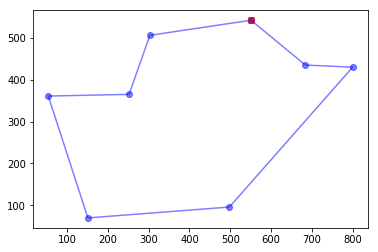

8 city tour; total distance = 1990.4; time = 0.029 secs for exact_TSP


In [16]:
%matplotlib inline

def plot_tour(algorithm, cities):
    "Apply a TSP algorithm to cities, and plot the resulting tour."
    # Find the solution and time how long it takes
    t0 = time.clock()
    tour = algorithm(cities)
    t1 = time.clock()
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline(list(tour) + [tour[0]])
    plotline([tour[0]], 'rs')
    plt.show()
    print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
          len(tour), total_distance(tour), t1-t0, algorithm.__name__))
    
def plotline(points, style='bo-'):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    plt.plot(X, Y, style, alpha=0.5)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]
    
plot_tour(exact_TSP, cities8)

The plot  looks much better than a list of coordinates!  Now let's try a much harder 10-city tour:

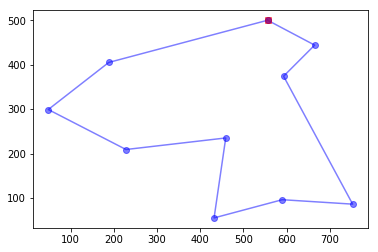

10 city tour; total distance = 2050.3; time = 1.699 secs for exact_TSP


In [17]:
plot_tour(exact_TSP, cities10)

It can take about 2-3 seconds on a machine to solve this problem. In general, the function `TSP` looks at (*n*-1)! tours for an *n*-city problem, and each tour has $n$ cities, so the time for $n$ cities should be roughly proportional to *n*!. 

This means that the time grows rapidly with the number of cities; we'd need longer than the age of the Universe to run `exact_TSP` on just 24 cities:

<table>
<tr><th>n cities<th>time
<tr><td>10<td>3 secs
<tr><td>12<td>3 secs &times; 12 &times; 11 = 6.6 mins
<tr><td>14<td>6.6 mins &times; 13 &times; 14 = 20 hours
<tr><td>24<td>3 secs &times; 24! / 10! = 16 billion years
</table>

There must be a better way ...

# Approximate Algorithms

The *general, exact* Traveling Salesperson Problem is intractable; there is no efficient algorithm to find the tour with minimum total distance.  

But if we restrict ourselves to Euclidean distance and **if we are willing to settle for a tour that is *reasonably* short but not the shortest**, then the news is much better.  There are several *approximate* algorithms, which find tours that are usually within 10 or 20% of the shortest possible and can handle thousands of cities in a few seconds.

## Algorithm 2: Greedy Nearest Neighbor (greedy_TSP)

Here is our first approximate algorithm:

> Start at any city; at each step extend the tour by moving from the previous city to its nearest neighbor that has not yet been visited.

This is called a *greedy algorithm*, because it greedily takes what looks best in the short term (the nearest neighbor) even when that won't always be the best in the long term.  

To implement the algorithm I need to represent all the noun phrases in the English description: 

+ "start" (a city; arbitrarily the first city); 
+ "the tour" (a list of cities, initialy just the start city); 
+ "previous city" (the last element of tour, that is, `tour[-1]`); 
+ "nearest neighbor" (a function that, when given a city, A, and a list of other cities, finds the one with minimal distance from A);
+ "not yet visited" (we will keep a set of unvisited cities; initially all cities but the start city are unvisited).

Once these are initialized, we repeatedly find the nearest unvisited neighbor, `C`, and add it to the tour and remove it from `unvisited`:

> In Python, as in the formal mathematical theory of computability, `lambda` is the symbol for *function*, so "`lambda x: distance(x, A)`" means the function of `x` that computes the distance from `x` to the city `A`. The name `lambda` comes from the Greek letter &lambda;.

We can compare the fast approximate `greedy_TSP` algorithm to the slow `exact_TSP` algorithm on a small map, as shown below.  (If you have this page in a IPython notebook you can repeatedly `run` the cell, and see how the algorithms compare. `Cities(9)` will return a different set of cities each time.  I ran it 20 times, and only once did the greedy algorithm find the optimal solution, but half the time it was within 10% of optimal, and it was never more than 25% worse than optimal.)

In [18]:
def greedy_TSP(cities):
    "At each step, visit the nearest neighbor that is still unvisited."
    start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

def nearest_neighbor(A, cities):
    "Find the city in cities that is nearest to city A."
    return min(cities, key=lambda x: distance(x, A))

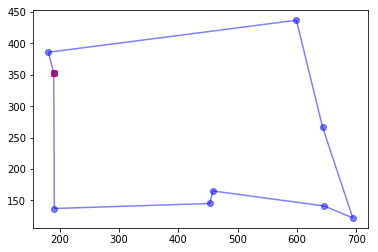

9 city tour; total distance = 1524.5; time = 0.196 secs for exact_TSP


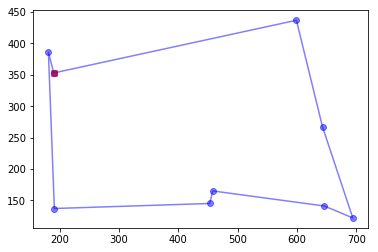

9 city tour; total distance = 1554.1; time = 0.000 secs for greedy_TSP


In [19]:
cities = Cities(9)
plot_tour(exact_TSP, cities)
plot_tour(greedy_TSP, cities)

But the key is that the greedy algorithm can quickly tackle problems that the optimal algorithm can't touch.  Finding a tour of 100 or even 1000 cities takes less than a second:

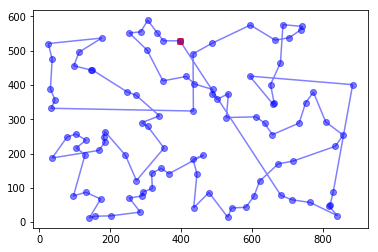

100 city tour; total distance = 6987.7; time = 0.002 secs for greedy_TSP


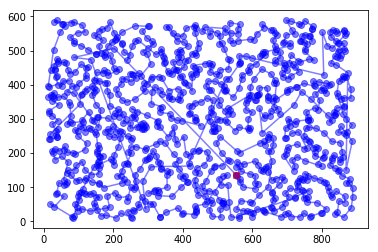

1000 city tour; total distance = 20529.4; time = 0.145 secs for greedy_TSP


In [20]:
plot_tour(greedy_TSP, cities100)
plot_tour(greedy_TSP, cities1000)

Can we do better?   Can we find shorter tours without taking an exponentially increasing amount of time?  Our challenge is to combine the speed of the greedy algorithm with the precision of the exact algorithm.  

We need an idea for how to get there ...

## Think of a Number from 1 to n!

Here's an idea: the `exact_TSP` algorithm is too slow for large *n*, because it considers all $n!$ tours.  But the `greedy_TSP` algorithm considers exactly one tour&mdash;the tour that starts at an arbitrary city and then transitions to the nearest neighbor (repeatedly).  

Could we get a good compromise between execution speed and total tour distance if we considered more than 1 but less than $n!$ tours?  

## Algorithm 3: Greedy Nearest Neighbor from All Starting Points (all_greedy_TSP)

Let's think about how to improve the greedy algorithm. In the plot of the 100-city tour with `greedy_TSP`, we see that **there are a few very-long edges between cities**.  

These come about because we get to a certain point in the greedy construction of the tour where there are no close-by cities, and we have to jump far away. In a way, this just seems like bad luck ;the way we flow from neighbor to neighbor just happens to leave a few very-long edges.  Just as with buying lottery tickets, we can improve our luck by trying more often:

> *For each city, run the greedy algorithm with that city as the starting point, and choose the resulting tour with the shortest total distance.*

So, with $n$ cities we run the `greedy_TSP` algorithm $n$ times, meaning the run time will be $n$ times longer, but the resulting tour will (in most cases) be shorter (and always at least as short as `greedy_TSP`). 

To implement  `all_greedy_TSP` we just take the shortest tour over all starting cities.  To do that requires a modification of `greedy_TSP` so that the starting city can be specified as an optional argument. Previously, `greedy_TSP` always used the first city as the strating point.  We will make `start` an optional parameter; if it is unspecified, we default to the old behavior of using the first city.

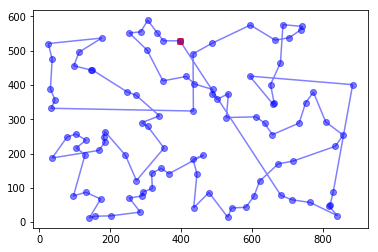

100 city tour; total distance = 6987.7; time = 0.002 secs for greedy_TSP


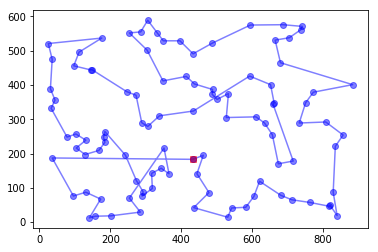

100 city tour; total distance = 6213.5; time = 0.157 secs for all_greedy_TSP


In [21]:
def all_greedy_TSP(cities):
    "Try the greedy algorithm from each of the starting cities; return the shortest tour."
    return shortest(greedy_TSP(cities, start=c) for c in cities)

# We will modify greedy_TSP to take an optional start city; otherwise it is unchanged.

def greedy_TSP(cities, start=None):
    "At each step, visit the nearest neighbor that is still unvisited."
    if start is None: start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    return tour

# Compare greedy_TSP to all_greedy_TSP
plot_tour(greedy_TSP, cities100)
plot_tour(all_greedy_TSP, cities100)

We see that `all_greedy_TSP` does indeed take about $n=100$ times longer to run, but it yields a tour that is 8% shorter than `greedy_TSP` (for this particular 100-city map).  

For the 1000-city problem it would take about 1000 times longer.  I didn't want to wait that long, so I didn't try.  Instead let's look for other algorithms that better balance speed and shorter tours.

## Algorithm 4: Greedy Nearest Neighbor with Exact End (greedy_exact_end_TSP)

Of the several very-long edges between cities, it looks like most of them appear near the *end* of the tour.  That makes sense: when there are only a few cities left, it is not surprising that the nearest one might be far away. So here's an idea: 
    
> Use the greedy algorithm for all but the last few cities (about 8), then use the exact algorithm over all possible ways to complete the tour.

This is another example of the "pick a number from 1 to $n!$" idea, this time picking $8!$ as the number of tours to consider.
We'll define the function `greedy_exact_end_TSP` to take a parameter `end_size` to say how many cities at the end we will consider an exact solution for.  The default is `end_size=8`.  

Suppose we are solving a 1000-city problem and have constructed a greedy tour through 992 cities, and now want to complete the final 8 cities.  We will consider all 8! = 40,320 permutations of those cities. The simple way to do that is: generate all permutations of the 8 cities, and one at a time, append the 8 onto the 992 to yield a 1000-city tour, and calculate the total-distance for each such tour.  Choose the shortest.

But that means we're computing `total_distance` of a 1000-city tour 40,320 times.  It would be 100 times faster if we could just compute the `total_distance` of 10-city tours instead of 1000-city tours.  Fortunately, we can do that.  Since all 992 cities of the greedy part of the tour stay the same, their contribution to the total distance is the same for every permutation, *except* for the contribution of the first and last city out of the 992. So we can omit the 990 cities in the middle of the greedy part, and just evaluate the `total_distance` over a tour consisting of the first and last cities of the 992, followed by a permutation of the 8 remaining cities.  Again, try them all and choose the shortest, and once we have the shortest, put the omitted cities back in.

In [22]:
import math

# the map instruction

a = [1,2,3,4]
print(list(map(math.sqrt, a)))

a = [[1,2],[3,4]]
print(list(map(tuple, a)))

[1.0, 1.4142135623730951, 1.7320508075688772, 2.0]
[(1, 2), (3, 4)]


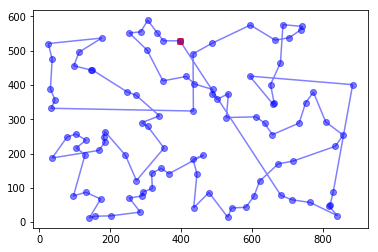

100 city tour; total distance = 6987.7; time = 0.209 secs for greedy_exact_end_TSP


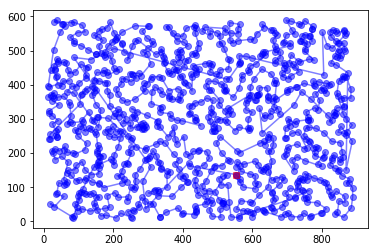

1000 city tour; total distance = 20171.0; time = 0.316 secs for greedy_exact_end_TSP


In [24]:
def greedy_exact_end_TSP(cities, start=None, end_size=8):
    """At each step, visit the nearest neighbor that is still unvisited until
    there are k_end cities left; then choose the best of all possible endings."""   
    if start is None: start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    # Use greedy algorithm for all but the last end_size cities
    while len(unvisited) > end_size:
        C = nearest_neighbor(tour[-1], unvisited)
        tour.append(C)
        unvisited.remove(C)
    # Consider all permutations of possible ends to the tour, and choose the best one.  
    # (But to make things faster, omit the middle of the tour.)
    ends = map(list, itertools.permutations(unvisited))   
    best = shortest([tour[0], tour[-1]] + end for end in ends)
    return tour + best[2:]

plot_tour(greedy_exact_end_TSP, cities100)
plot_tour(greedy_exact_end_TSP, cities1000)

We see that `greedy_exact_end_TSP` is a bit disapointing on the 100-city map; it gives a longer tour than `all_greedy_TSP` and is no faster.  But on the 1000-city map, it is faster than the expected run time of `all_greedy_TSP`.

## Algorithm 5: Greedy Nearest Neighbor with Both Ends Search (greedy_bi_TSP)

Should we spend our computation time on different cities at the start of the tour (as in `all_greedy_TSP`) or on different permutations at the end of the tour (as in `greedy_exact_end_TSP`)?  *Why not do both?* 

In the function `greedy_bi_TSP` we combine an `end_size` parameter to say how many of the final cities to do exact search over, and a `start_size` parameter to say how many different starting cities to try.  We won't necessarily try *all* starting cities, and the ones we do try will be sampled at random.  

We try the algorithm with a default of 12 starting cities and 7 cities at the end; the results on both the 100-city and 1000-city maps are shorter than any other algorithm we have seen so far.  That's encouraging, but with other choices of random starting points the results might be different, and on other maps the results might be different.  I would want more convincing evidence before declaring this algorithm the champion.

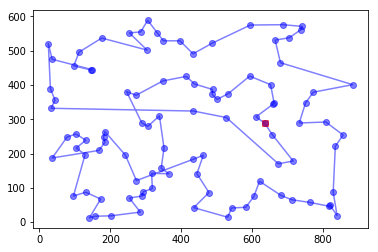

100 city tour; total distance = 6230.0; time = 0.069 secs for greedy_bi_TSP


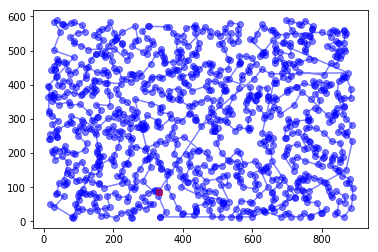

1000 city tour; total distance = 20070.7; time = 1.697 secs for greedy_bi_TSP


In [25]:
def greedy_bi_TSP(cities, start_size=12, end_size=6):
    "At each step, visit the nearest neighbor that is still unvisited."
    starts = random.sample(cities, min(len(cities), start_size))
    return shortest(greedy_exact_end_TSP(cities, start, end_size) 
                    for start in starts)

random.seed('bi')
plot_tour(greedy_bi_TSP, cities100)
plot_tour(greedy_bi_TSP, cities1000)

## Benchmarking Algorithms

If we only consider one or two maps we can't be confident which algorithm is best. It would be better to average over, say, 50 or 100 random maps at a time and see a summary of the total distances produced by different algorithms on these maps.  

We'll define the `compare_algorithms` function to take a list of TSP algorithms and a list of maps, and apply each algorithm to all the maps.  

For each algorithm we collect all the total distances on all the maps, and then sort the distances to get a monitonically increasing curve.  We can then compare the curves: the lower the curve, the better.  The chart legend also gives the total time in seconds and the average tour length for each algorithm. 

Here is the code and a comparison plot: 

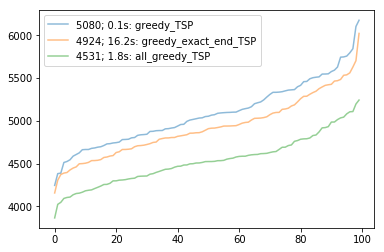

100 x 50-city maps


In [26]:
def compare_algorithms(algorithms, maps):
    "Apply each algorithm to each map and plot results."
    for algorithm in algorithms:
        t0 = time.clock()
        results = [total_distance(algorithm(m)) for m in maps]
        t1 = time.clock()
        avg = sum(results) / len(results)
        label = '{:.0f}; {:.1f}s: {}'.format(avg, t1-t0, algorithm.__name__)
        plt.plot(sorted(results), label=label, alpha=0.5)
    plt.legend(loc=2)
    plt.show()
    print('{} x {}-city maps'.format(len(maps), len(maps[0])))
    
def Maps(M, N):
    "Return a list of M maps, each consisting of a set of N cities."
    return [Cities(N) for m in range(M)]

compare_algorithms([greedy_TSP, greedy_exact_end_TSP, all_greedy_TSP], Maps(100, 50))

We see that `greedy_TSP` (the blue line) is the fastest of the three algorithms, but gives the longest tours (as expected).  `greedy_exact_end` is the slowest, by far, and only a little bit shorter than `greedy_TSP`.  The winner looks like `all_greedy_TSP`; significantly shorter tours with not-too-long runtimes. This suggests that the multiple starting points are helping more than the permutation of ending cities, but let's explore the tradeoff by considering multiple points along the way:

In [30]:
def bi_10_6(cities):  return greedy_bi_TSP(cities,  10, 6)
def bi_20_5(cities):  return greedy_bi_TSP(cities,  20, 5)
def bi_40_4(cities):  return greedy_bi_TSP(cities,  40, 4)
def bi_80_2(cities):  return greedy_bi_TSP(cities,  80, 2)
def bi_160_1(cities): return greedy_bi_TSP(cities, 160, 1)

algorithms = [bi_10_6, bi_20_5, bi_40_4, bi_80_2, bi_160_1]

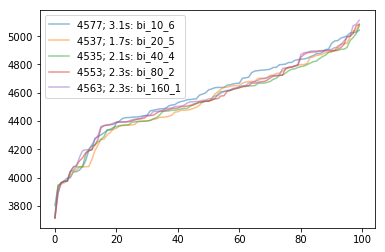

100 x 50-city maps


In [31]:
compare_algorithms(algorithms, Maps(100, 50))

We see that for 50-city maps all the parameter choices perform similarly.  How about with 100-city maps?

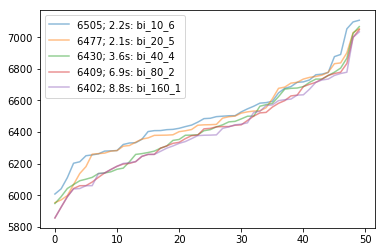

50 x 100-city maps


In [32]:
compare_algorithms(algorithms, Maps(50, 100))

Again, there is no clear winner.  Let's try 160-city maps:

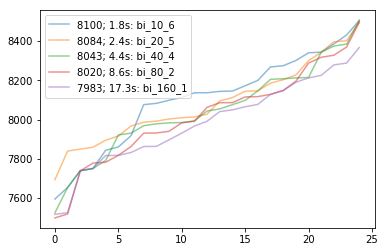

25 x 160-city maps


In [33]:
compare_algorithms(algorithms, Maps(25, 160))

We're starting to see a bit of separation: `bi_160_1`, which tries all starting cities and only one permutation at the end, is the best, but still not by a wide margin.

Now we could gather more statistics, and we could do a *significance test* to quantify the probability that the winning algorithm really is the best, or just benefitted from lucky random variation.  Doing that kind of test is a useful exercise, but I feel like we should explore other completely different algorithms before spending times splitting hairs over the best parameters to `greedy_bi_TSP`. 

We can do a *postmortem analysis* where we examine what went wrong with the greedy algorithm and try to come up with ways to improve. 

## The Trouble with Greedy: Outliers

In the 20-city map below, we give an illustrative example of where greedy algorithms go wrong.  We have 4 cities scattered around the outskirts of an inner square of 16 cities.  The issue is that a greedy algorithm that starts anywhere in the inner square will traverse the whole square, *ignoring the outlying points*, and then at the end we will be left with long paths to the outliers. 

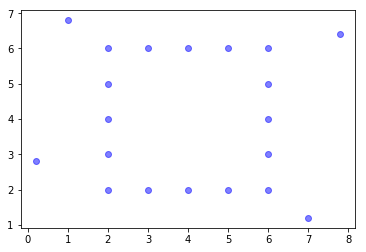

In [27]:
outliers_list = [City(2, 2),  City(2, 3),  City(2, 4),  City(2, 5),  City(2, 6),  
                 City(3, 6),  City(4, 6),  City(5, 6),  City(6, 6),  
                 City(6, 5),  City(6, 4),  City(6, 3),  City(6, 2),  
                 City(5, 2),  City(4, 2),  City(3, 2),  
                 City(1, 6.8),  City(7.8, 6.4),  City(7, 1.2),  City(0.2, 2.8)]

plotline(outliers_list, 'bo')

 For example, in the plot below, the `greedy_TSP` algorithm tour starts at the red point, moves clockwise around the inner square, and then picks up the four outlying points in counter-clockwise order, with four very long edges. 

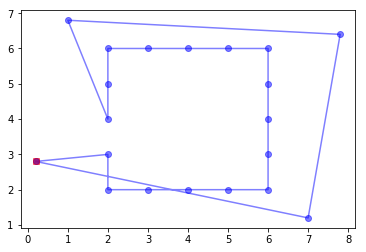

20 city tour; total distance = 38.8; time = 0.000 secs for greedy_TSP


In [28]:
outliers = set(outliers_list)

plot_tour(greedy_TSP, outliers)

`all_greedy_TSP` has the same problem:  

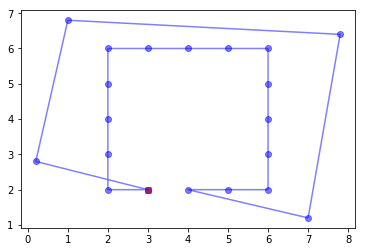

20 city tour; total distance = 37.2; time = 0.002 secs for all_greedy_TSP


In [47]:
plot_tour(all_greedy_TSP, outliers)

The algorithms that search over permutations of ending cities (`greedy_exact_end_TSP` and `greedy_bi_TSP`) do somewhat better: an end-size of 8 is enough to pick up two of the four outliers in a reasonable postion.  But not all four outliers. 

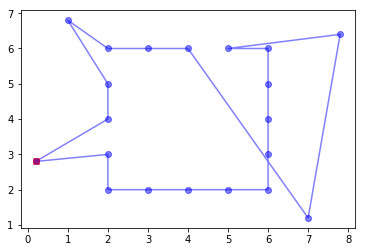

20 city tour; total distance = 34.1; time = 0.225 secs for greedy_exact_end_TSP


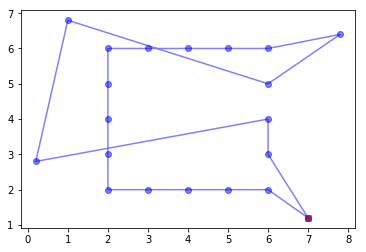

20 city tour; total distance = 35.8; time = 0.033 secs for greedy_bi_TSP


In [48]:
plot_tour(greedy_exact_end_TSP, outliers)
plot_tour(greedy_bi_TSP, outliers)


Let's try to understand what went wrong.  First we'll create some more tools to better draw diagrams.

In [29]:
def plot_lines(points, labels, *args):
    """Takes a list of points and a (possibly empty) list of labels for them,
    followed by any number of args which can be either a string, indicating a new line style, like 'bo-',
    or a list of indexes into points, like [0, 1, 2, 3], which indicates a line through those points."""
    plot_points(points, labels)
    style = 'bo-'
    for arg in args:
        if isinstance(arg, str):
            style = arg
        else: # arg is a list of indexes into points, forming a line
            line = [points[i] for i in arg]
            X, Y = XY(line)
            plt.plot(X, Y, style)
    plt.show()
    
def plot_points(points, labels=(), style='bo'):
    "Plot individual points (and maybe labels for them) without any lines."
    plot_labels(points, labels)
    for p in points:
        plt.plot([p.real], [p.imag], style)
        
def plot_labels(cities, labels):
    "If any labels are supplied, plot them."
    for (c, L) in zip(cities, labels):
        plt.text(c.real, c.imag, '  '+str(L))

In the diagram below, imagine we are running some variation of a greedy algorithm, and it has created a partial tour from city 0 to city 4.  Now there is a choice.  City 5 is the nearest neighbor.  But if we don't take city 16 at this point, we will have to pay a higher price sometime later to pick up city 16.  This is an example of when it doesn't pay to be greedy in the short run&mdash;we need to think about the future consequences of not selecting 16 now.

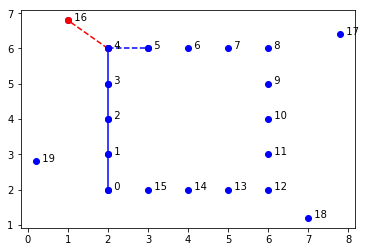

In [30]:
plot_lines(outliers_list, range(20), range(0, 5), 'ro--', [4, 16], 'bo--', [4, 5])

## Algorithm 6: Nearest Neighbors <i>of</i> a city and <i>to</i> a city (double_greedy_TSP)

How could we fix the issue?  Let's arrange to not skip a city when it is its time. That is, even if outlying city *C* (like city 16 in the diagram above) does not happen to be the nearest neighbor to the tour's endpoint (city 4 in the diagram above), if *C* is not near to any other city, then probably now is a good time to add it to the tour. 

That is, I should add *C* to the tour if either *C* is the nearest neighbor of the tour's endpoint, or if *C*'s nearest neighbor is the tour's endpoint. 

We call this algorithm `double_greedy_TSP`. For efficiency, it precomputes the nearest neighbor of each city and stores it the dict `NN`. It tracks the tour and the unvisited cities, just like `greedy_TSP`.  On each iteration, it does this: call the last city in the tour `A`, and its nearest neighbor `B`.  Then form the set `Ds` of all cities for whom `A` is the nearest neighbor. If there are any, make the chosen city, `C` be the closest member of `Ds`; if there aren't any, make `C` be the nearest neighbor, `B`.  Add `C` to the tour and remove it from `unvisited`.

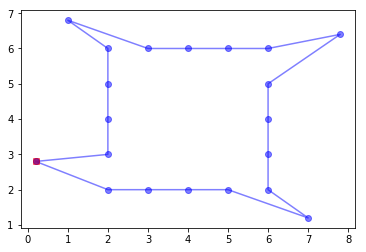

20 city tour; total distance = 26.8; time = 0.000 secs for double_greedy_TSP


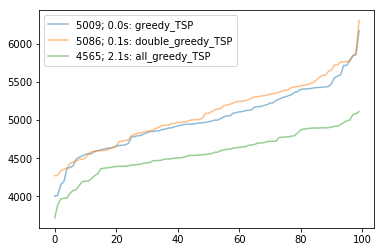

100 x 50-city maps


In [31]:
def double_greedy_TSP(cities, start=None):
    """At each step, call the last city in the tour A, and consider the
    nearest neighbor B, and also any city D that has A as nearest neighbor."""
    NN = {C: nearest_neighbor(C, cities - {C}) for C in cities}
    if start is None: start = first(cities)
    tour = [start]
    unvisited = cities - {start}
    while unvisited:
        A = tour[-1]
        B = NN[A] if NN[A] in unvisited else nearest_neighbor(A, unvisited)
        Ds = [D for D in unvisited if NN[D] is A and D is not B]
        C = (min(Ds, key=lambda D: distance(D, A))) if Ds else B
        tour.append(C)
        unvisited.remove(C)
    return tour

plot_tour(double_greedy_TSP, outliers)
compare_algorithms([greedy_TSP, double_greedy_TSP, all_greedy_TSP], Maps(100, 50))

We see that `double_greedy_TSP` completely solves the `outliers` map.  Unfortunately, it fails to turn in a distinguished performance on a collection of 50-city maps, performing roughly the same as the simple `greedy_TSP` (but slower).  It seems that it is not *always* a good idea to pick up an outlier.  So what can we do?  

## Example

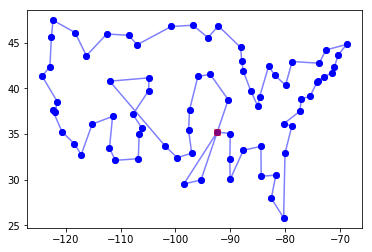

75 city tour; total distance = 230.7; time = 0.069 secs for all_greedy_TSP


In [32]:
def parse_city(line):
    '''
    "Parse a line of data, as in http://www.realestate3d.com/gps/latlong.htm , 
    and return a (City, cityname, state) triplet.
    '''
    code, lat, long, name = line.split(None, 3)
    cityname, state = name.split(',')
    return City(-float(long), float(lat)), cityname, state

UScityData = map(parse_city, """
[TCL]  33.23   87.62  Tuscaloosa,AL
[PHX]  33.43  112.02  Phoenix,AZ
[PGA]  36.93  111.45  Page,AZ
[TUS]  32.12  110.93  Tucson,AZ
[LIT]  35.22   92.38  Little Rock,AR
[SFO]  37.62  122.38  San Francisco,CA
[LAX]  33.93  118.40  Los Angeles,CA
[SAC]  38.52  121.50  Sacramento,CA
[SAN]  32.73  117.17  San Diego,CA
[SBP]  35.23  120.65  San Luis Obi,CA
[EKA]  41.33  124.28  Eureka,CA
[SJC]  37.37  121.92  San Jose,CA
[DEN]  39.75  104.87  Denver,CO
[DRO]  37.15  107.75  Durango,CO
[HVN]  41.27   72.88  New Haven,CT
[DOV]  39.13   75.47  Dover,DE
[DCA]  38.85   77.04  Washington/Natl,DC
[MIA]  25.82   80.28  Miami Intl,FL
[TPA]  27.97   82.53  Tampa Intl,FL
[JAX]  30.50   81.70  Jacksonville,FL
[TLH]  30.38   84.37  Tallahassee,FL
[ATL]  33.65   84.42  Atlanta,GA
[BOI]  43.57  116.22  Boise,ID
[CHI]  41.90   87.65  Chicago,IL
[IND]  39.73   86.27  Indianapolis,IN
[DSM]  41.53   93.65  Des Moines,IA
[ICT]  37.65   97.43  Wichita,KS
[LEX]  38.05   85.00  Lexington,KY
[NEW]  30.03   90.03  New Orleans,LA
[BOS]  42.37   71.03  Boston,MA
[PWM]  43.65   70.32  Portland,ME
[BGR]  44.80   68.82  Bangor,ME
[DET]  42.42   83.02  Detroit,MI
[STC]  45.55   94.07  St Cloud,MN
[DLH]  46.83   92.18  Duluth,MN
[STL]  38.75   90.37  St Louis,MO
[JAN]  32.32   90.08  Jackson,MS
[BIL]  45.80  108.53  Billings,MT
[BTM]  45.95  112.50  Butte,MT
[RDU]  35.87   78.78  Raleigh-Durh,NC
[INT]  36.13   80.23  Winston-Salem,NC
[OMA]  41.30   95.90  Omaha/Eppley,NE
[LAS]  36.08  115.17  Las Vegas,NV
[EWR]  40.70   74.17  Newark Intl,NJ
[ABQ]  35.05  106.60  Albuquerque,NM
[SAF]  35.62  106.08  Santa Fe,NM
[LRU]  32.30  106.77  Las Cruces,NM
[NYC]  40.77   73.98  New York,NY
[BUF]  42.93   78.73  Buffalo,NY
[ALB]  42.75   73.80  Albany,NY
[FAR]  46.90   96.80  Fargo,ND
[BIS]  46.77  100.75  Bismarck,ND
[CVG]  39.05   84.67  Cincinnati,OH
[CLE]  41.42   81.87  Cleveland,OH
[OKC]  35.40   97.60  Oklahoma Cty,OK
[PDX]  45.60  122.60  Portland,OR
[MFR]  42.37  122.87  Medford,OR
[AGC]  40.35   79.93  Pittsburgh,PA
[PVD]  41.73   71.43  Providence,RI
[CHS]  32.90   80.03  Charleston,SC
[MEM]  35.05   90.00  Memphis Intl,TN
[DFW]  32.90   97.03  Dallas/FW,TX
[LBB]  33.65  101.82  Lubbock,TX
[IAH]  29.97   95.35  Houston,TX
[SAT]  29.53   98.47  San Antonio,TX
[ABI]  32.42   99.68  Abilene,TX
[SLC]  40.78  111.97  Salt Lake Ct,UT
[MPV]  44.20   72.57  Montpelier,VT
[RIC]  37.50   77.33  Richmond,VA
[SEA]  47.45  122.30  Seattle,WA
[ALW]  46.10  118.28  Walla Walla,WA
[GRB]  44.48   88.13  Green Bay,WI
[MKE]  42.95   87.90  Milwaukee,WI
[CYS]  41.15  104.82  Cheyenne,WY
[SHR]  44.77  106.97  Sheridan,WY
""".strip().splitlines())
    
UScities = [data[0] for data in UScityData]

def bi_80_6(cities):  return greedy_bi_TSP(cities,  80, 6)
        
plot_points(UScities, [data[1][0] for data in UScityData])
plot_tour(all_greedy_TSP, set(UScities))

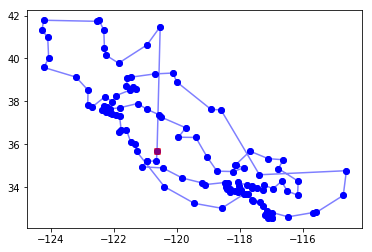

117 city tour; total distance = 62.2; time = 0.221 secs for all_greedy_TSP


In [33]:
def parse_city(line):
    "Parse a line of data, as in http://www.realestate3d.com/gps/latlong.htm , and return a (City, cityname, state) triplet."
    code, lat, long, name = line.split(None, 3)
    cityname, state = name.split(',')
    return City(-float(long), float(lat)), cityname, state

CAcityData = map(parse_city, """
[NGZ]  37.78  122.32  Alameda NAS,CA
[S11]  41.48  120.53  Alturas,CA
[ACV]  40.98  124.10  Arcata,CA
[BFL]  35.43  119.05  Bakersfield,CA
[BAB]  39.13  121.45  Beale AFB,CA
[BUO]  33.93  116.95  Beaumont,CA
[BYS]  35.28  116.62  Bicycle Lk,CA
[L35]  34.27  116.68  Big Bear Apt,CA
[BIH]  37.60  118.60  Bishop,CA
[BLU]  39.28  120.70  Blue Canyon,CA
[BLH]  33.62  114.72  Blythe,CA
[BUR]  34.20  118.37  Burbank,CA
[NFG]  33.30  117.35  Camp Pendlet,CA
[CZZ]  32.62  116.47  Campo,CA
[CRQ]  33.13  117.28  Carlsbad,CA
[MER]  37.38  120.57  Castle AFB,CA
[CIC]  39.78  121.85  Chico,CA
[NID]  35.68  117.68  China Lake,CA
[CNO]  33.97  117.63  Chino,CA
[CCR]  37.98  122.05  Concord,CA
[CEC]  41.78  124.23  Crescent Cty,CA
[DAG]  34.87  116.78  Daggett,CA
[EDW]  34.90  117.88  Edwards AFB,CA
[NJK]  32.82  115.68  El Centro,CA
[EMT]  34.08  118.03  El Monte,CA
[NZJ]  33.67  117.73  El Toro,CA
[EKA]  41.33  124.28  Eureka,CA
[HGT]  36.00  121.32  Fort Hunter,CA
[OAR]  36.68  121.77  Fort Ord,CA
[FAT]  36.77  119.72  Fresno,CA
[FUL]  33.87  117.97  Fullerton,CA
[VCV]  34.58  117.38  George AFB,CA
[HHR]  33.92  118.33  Hawthorne,CA
[HWD]  37.65  122.12  Hayward,CA
[IPL]  32.83  115.57  Imperial,CA
[NRS]  32.57  117.12  Imperial Bch,CA
[POC]  34.10  117.78  La Verne,CA
[TVL]  38.90  120.00  Lake Tahoe,CA
[WJF]  34.73  118.22  Lancaster,CA
[NLC]  36.33  119.95  Lemoore NAS,CA
[LVK]  37.70  121.82  Livermore,CA
[LGB]  33.82  118.15  Long Beach,CA
[SLI]  33.78  118.05  Los Alamitos,CA
[LAX]  33.93  118.40  Los Angeles,CA
[MMH]  37.63  118.92  Mammoth Lks,CA
[RIV]  33.88  117.27  March AFB,CA
[MYV]  39.10  121.57  Marysville,CA
[MHR]  38.57  121.30  Mather AFB,CA
[MCC]  38.67  121.40  Mcclellan,CA
[MCE]  37.28  120.52  Merced,CA
[NKX]  32.87  117.15  Miramar NAS,CA
[MOD]  37.63  120.95  Modesto,CA
[NUQ]  37.42  122.05  Moffet NAS,CA
[MHV]  35.05  118.15  Mojave,CA
[1O5]  41.73  122.53  Montague,CA
[MRY]  36.58  121.85  Monterey,CA
[MHS]  41.32  122.32  Mount Shasta,CA
[MWS]  34.23  118.07  Mount Wilson,CA
[APC]  38.22  122.28  Napa,CA
[EED]  34.77  114.62  Needles,CA
[NZY]  32.70  117.20  North Is,CA
[SBD]  34.10  117.23  Norton AFB,CA
[OAK]  37.73  122.22  Oakland,CA
[ONT]  34.05  117.62  Ontario Intl,CA
[OXR]  34.20  119.20  Oxnard,CA
[PSP]  33.83  116.50  Palm Springs,CA
[PMD]  35.05  118.13  Palmdale,CA
[PAO]  37.47  122.12  Palo Alto,CA
[PRB]  35.67  120.63  Paso Robles,CA
[53Q]  37.83  122.83  Pillaro Pt,CA
[NTD]  34.12  119.12  Point Mugu,CA
[PAA]  39.58  124.22  Pt Arena,CA
[PGU]  34.95  121.12  Pt Arguello,CA
[87Q]  35.67  121.28  Pt Piedras,CA
[PPD]  36.12  121.47  Pt Piedras,CA
[RBL]  40.15  122.25  Red Bluff,CA
[RDD]  40.50  122.30  Redding,CA
[RAL]  33.95  117.45  Riverside,CA
[SAC]  38.52  121.50  Sacramento,CA
[SMF]  38.70  121.60  Sacramento,CA
[SNS]  36.67  121.60  Salinas,CA
[SQL]  37.52  122.25  San Carlos,CA
[L10]  33.42  117.62  San Clemente,CA
[NUC]  33.02  118.58  San Clemente,CA
[MYF]  32.82  117.13  San Diego,CA
[SAN]  32.73  117.17  San Diego,CA
[SDM]  32.57  116.98  San Diego,CA
[SDM]  32.57  116.98  San Diego,CA
[SEE]  32.82  116.97  San Diego,CA
[51Q]  37.75  122.68  San Francisco,CA
[SFO]  37.62  122.38  San Francisco,CA
[SJC]  37.37  121.92  San Jose,CA
[RHV]  37.33  121.82  San Jose/Rei,CA
[SBP]  35.23  120.65  San Luis Obi,CA
[L98]  33.38  117.58  San Mateo,CA
[N5G]  34.03  120.40  San Miguel,CA
[NSI]  33.25  119.45  San Nic Isl,CA
[SDB]  34.75  118.73  Sandburg,CA
[SNA]  33.67  117.88  Santa Ana,CA
[SBA]  34.43  119.83  Santa Barb,CA
[SMX]  34.90  120.45  Santa Maria,CA
[SMO]  34.02  118.45  Santa Monica,CA
[STS]  38.52  122.82  Santa Rosa,CA
[O87]  40.03  124.07  Shelter Cove,CA
[SIY]  41.78  122.47  Siskiyou,CA
[SCK]  37.90  121.25  Stockton,CA
[4SU]  35.33  117.10  Superior Val,CA
[SVE]  40.63  120.95  Susanville,CA
[TRM]  33.63  116.17  Thermal,CA
[TOA]  33.80  118.33  Torrance,CA
[SUU]  38.27  121.93  Travis AFB,CA
[TRK]  39.32  120.13  Truckee-Tahoe,CA
[NTK]  33.70  117.83  Tustin Mcas,CA
[NXP]  34.28  116.15  Twenty9 Palm,CA
[UKI]  39.13  123.20  Ukiah,CA
[VNY]  34.22  118.48  Van Nuys,CA
[VBG]  35.20  120.95  Vandenberg,CA
[VBG]  35.20  120.95  Vandenberg,CA
[VIS]  36.32  119.40  Visalia,CA
""".strip().splitlines())
    
CAcities = [data[0] for data in CAcityData]

def bi_80_6(cities):  return greedy_bi_TSP(cities,  80, 6)
        
plot_points(CAcities, [data[1][0] for data in CAcityData])
plot_tour(all_greedy_TSP, set(CAcities))

Overall strategies worth to try...
--------

* __Better choices__: figure out when it is a good idea to extend the tour to a non-nearest-neighbor, and when it is not.
    
* __More choices__: consider both including and not including a non-nearest neighbor. We will have multiple possible partial tours under consideration at any time.
    
* __Recovery from bad choices__: make one choice, but allow for the possibility of making changes. We will quickly build one single complete tour, and then will consider alterations to the tour.
    
So far we've seen 6 algorithms, but only two basic strategies:

- Exact algorithms: *Try all tours and choose the best.*
- Greedy algorithms: *Start with a partial tour (initially one city) and keep extending it by adding a near neighbor.*

We can introduce a third basic strategy:

- Improvement algorithms: *Use an old algorithm to produce a tour, then improve the tour by trying many small alterations,
and keeping those that make the tour shorter.*
    




## Genetic Version

http://nbviewer.ipython.org/url/lmarti.com/wp-content/uploads/2014/09/AEC.03-Solving-the-TSP-with-GAs.ipynb


> We will be using the [DEAP](https://github.com/DEAP/deap) library to code this tackle this problem using a genetic algorithm.

[<img src='https://raw.githubusercontent.com/DEAP/deap/master/doc/_static/deap_long.png' width='29%' align='center'/>](https://github.com/DEAP/deap)

In [34]:
!pip install deap

In [35]:
from deap import algorithms, base, creator, tools
import numpy 

/Users/jordi/anaconda/lib/python3.6/site-packages/deap/tools/_hypervolume/pyhv.py:33: ImportWarning: Falling back to the python version of hypervolume module. Expect this to be very slow.
  "module. Expect this to be very slow.", ImportWarning)


### Elements to take into account solving problems with genetic algorithms

* **Individual representation** (binary, floating-point, etc.);
* **evaluation** and **fitness assignment**;
* **selection**, that establishes a partial order of individuals in the population using their fitness function value as reference and determines the degree at which individuals in the population will take part in the generation of new (offspring) individuals.
* **variation**, that applies a range of evolution-inspired operators, like crossover, mutation, etc., to synthesize offspring individuals from the current (parent) population. This process is supposed to prime the fittest individuals so they play a bigger role in the generation of the offspring.
* **stopping criterion**, that determines when the algorithm shoulod be stopped, either because the optimum was reach or because the optimization process is not progressing.

### Hence a 'general' evolutionary algorithm can be described as

```
def evolutionary_algorithm():
    'Pseudocode of an evolutionary algorithm'    
    populations = [] # a list with all the populations
    
    populations[0] =  initialize_population(pop_size)
    t = 0
    
    while not stop_criterion(populations[t]):
        fitnesses = evaluate(populations[t])
        offspring = matting_and_variation(populations[t],
                                          fitnesses)
        populations[t+1] = environmental_selection(           
                                          populations[t],
                                          offspring)
        t = t+1
```

### Some preliminaries for the experiment

The `toolbox` stored the setup of the algorithm. It describes the different elements to take into account.

In [36]:
toolbox = base.Toolbox()

We will carry out our tests with a 40-cities problem.

In [37]:
num_cities = 40
cities = Cities(num_cities)

### Individual representation and evaluation
* Individuals represent possible solutions to the problem.
* In the TSP case, it looks like the tour itself can be a suitable representation.
* For simplicity, an individual can be a list with the indexes corresponding to each city.
* This will simplify the crossover and mutation operators.
* We can rely on the `total_distance()` function for evaluation and set the fitness assignment as to minimize it.


In [38]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)

Let's now define that our individuals are composed by indexes that refer to elements of `cities` and, correspondingly, the population is composed by individuals.

In [39]:
toolbox.register("indices", numpy.random.permutation, len(cities))
toolbox.register("individual", tools.initIterate, creator.Individual,
                 toolbox.indices)
toolbox.register("population", tools.initRepeat, list, 
                 toolbox.individual)

Defining the crossover and mutation operators can be a challenging task.

There are  various <a href='http://en.wikipedia.org/wiki/Crossover_(genetic_algorithm)#Crossover_for_Ordered_Chromosomes'>crossover operators</a> that have been devised to deal with ordered individuals like ours.

- We will be using DEAP's `deap.tools.cxOrdered()` crossover.
- For mutation we will swap elements from two points of the individual.
- This is performed by `deap.tools.mutShuffleIndexes()`.

In [40]:
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.05)

Evaluation can be easily defined from the total_distance() definition.

In [41]:
def create_tour(individual):
    return [list(cities)[e] for e in individual]

In [42]:
def evaluation(individual):
    '''Evaluates an individual by converting it into 
    a list of cities and passing that list to total_distance'''
    return (total_distance(create_tour(individual)),)

In [43]:
toolbox.register("evaluate", evaluation)

We will employ tournament selection with size 3.

In [44]:
toolbox.register("select", tools.selTournament, tournsize=3)

Lets' run the algorithm with a population of 100 individuals and 400 generations.

In [45]:
pop = toolbox.population(n=100)

In [46]:
%%time
result, log = algorithms.eaSimple(pop, toolbox, 
                                  cxpb=0.8, mutpb=0.2, 
                                  ngen=400, verbose=False)

CPU times: user 5.74 s, sys: 14.2 ms, total: 5.76 s
Wall time: 5.78 s


### We can now review the results

The best individual of the last population:

In [47]:
best_individual = tools.selBest(result, k=1)[0]
print('Fitness of the best individual: ', evaluation(best_individual)[0])

Fitness of the best individual:  4283.219050032


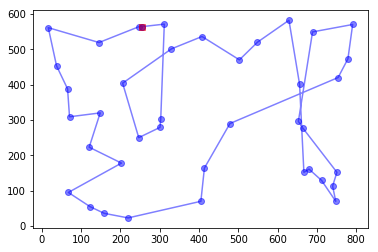

In [48]:
def plot_tour2(tour, alpha=0.5, color=None):
    # Plot the tour as blue lines between blue circles, and the starting city as a red square.
    plotline2(list(tour) + [tour[0]], alpha=alpha, color=color)
    plotline2([tour[0]], 'rs', alpha=alpha)
    # plt.show()
    
def plotline2(points, style='bo-', alpha=1, color=None):
    "Plot a list of points (complex numbers) in the 2-D plane."
    X, Y = XY(points)
    
    if color:
        plt.plot(X, Y, style, alpha=alpha, color=color)
    else:
        plt.plot(X, Y, style, alpha=alpha)
    
def XY(points):
    "Given a list of points, return two lists: X coordinates, and Y coordinates."
    return [p.real for p in points], [p.imag for p in points]

plot_tour2(create_tour(best_individual))


It is interesting to assess how the fitness of the population changed as the evolution process took place.

We can prepare an ``deap.tools.Statistics`` instance to specify what data to collect.

In [49]:
fit_stats = tools.Statistics(key=lambda ind: ind.fitness.values)
fit_stats.register('mean', numpy.mean)
fit_stats.register('min', numpy.min)

We are all set now, but lets run again the genetic algorithm configured to collect the statistics that we want to gather:

In [50]:
result, log = algorithms.eaSimple(toolbox.population(n=100), toolbox, 
                                  cxpb=0.5, mutpb=0.2, 
                                  ngen=400, verbose=False, 
                                  stats=fit_stats)

### Plotting mean and minimium fitness as evolution took place.

Text(0.5,0,'Iterations')

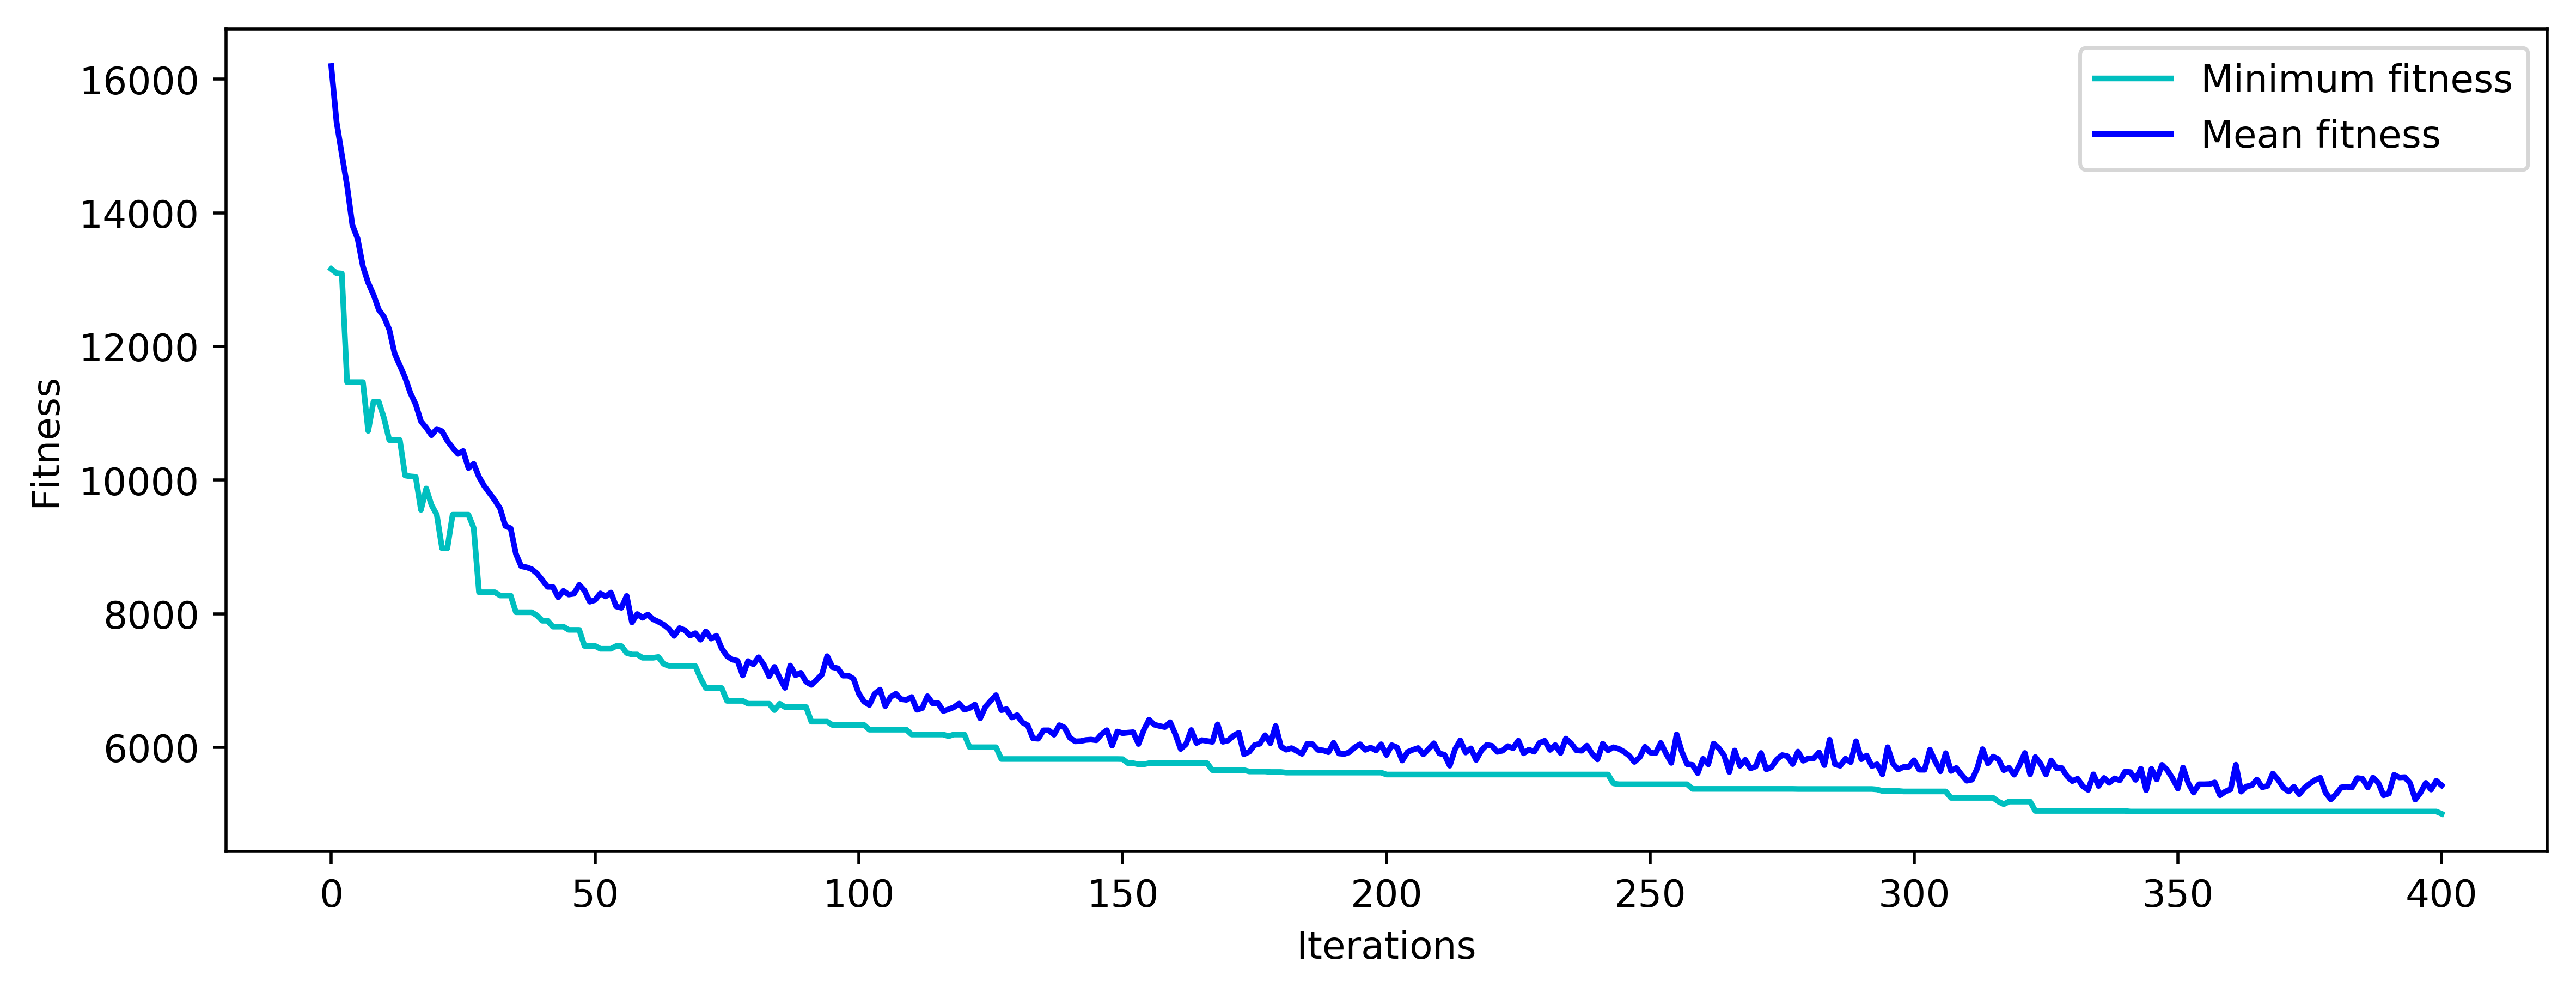

In [51]:
plt.figure(1, figsize=(11, 4), dpi=500)
plots = plt.plot(log.select('min'),'c-', log.select('mean'), 'b-', antialiased=True)
plt.legend(plots, ('Minimum fitness', 'Mean fitness'))
plt.ylabel('Fitness')
plt.xlabel('Iterations')

## Comparison with greedy_TSP()

In [52]:
print('greedy_TSP() distance: ', total_distance(greedy_TSP(cities)))
print('Genetic algorithm best distance: ', evaluation(best_individual)[0])

greedy_TSP() distance:  4097.919624231729
Genetic algorithm best distance:  4283.219050032


In [1]:
# Executar aquesta cel.la per donar estil al notebook
from IPython.core.display import HTML
import requests
style=requests.get('https://raw.githubusercontent.com/MireiaUB/algorismica2019.github.io/patch-1/prova.css').text
HTML('<style>{}</style>'.format(style))

<div id="peu">
<p><a href="https://colab.research.google.com/github/algorismica2019/algorismica2019.github.io/blob/master/problemes/TravelingSalesmanProblem-Original.ipynb"><img style="margin:-10px 10px 20px 0" width="150px" align="right" src="https://raw.githubusercontent.com/algorismica2019/algorismica2019.github.io/master/problemes/assets/colab-badge.png?raw=1" alt="Obrir a Colab" title="Obrir i executar a Google Colaboratory"></a></p>
<p style="clear:both;text-align:center">&lt; <a href="Mastermind.ipynb">Problema anterior</a> | <a href="LListatProblemes.ipynb">LListat de problemes</a> | <a href="Annex.ipynb">Problema següent</a> &gt; </p>
</div>